In [1]:
!pip install geopandas
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data = pd.read_csv("all-need.csv")
data.head(30)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174186 entries, 0 to 174185
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              174186 non-null  int64  
 1   statename               174154 non-null  object 
 2   year                    174154 non-null  float64
 3   constituency            174186 non-null  object 
 4   distname                170544 non-null  object 
 5   educationNum            174186 non-null  int64  
 6   winner                  174154 non-null  object 
 7   gender                  174173 non-null  object 
 8   criminal_cases          174186 non-null  int64  
 9   serious_criminal_cases  174186 non-null  int64  
 10  Unnamed: 10             174186 non-null  int64  
 11  assets                  174186 non-null  int64  
 12  liabilities             174186 non-null  int64  
 13  net_assets              174186 non-null  int64  
 14  assetsIndex         

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data['creported'] = data['criminal_cases']*data['serious_criminal_cases']/5
data['net_assets'] = data['net_assets']+1
data['assetLog'] = np.log10(data['net_assets'])
r = pd.DataFrame(data.groupby(['statename','distname'])['assetLog','educationNum','creported','finalIndex'].mean().reset_index())
r.columns = ['statename','distname', 'avg_assets','education Num','CASES REPORTED','final']
r.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,statename,distname,avg_assets,education Num,CASES REPORTED,final
0,Andhra Pradesh,Anantapur,5.712889,15.791423,0.740741,0.245249
1,Andhra Pradesh,Chittoor,5.908341,17.568702,0.434733,0.268893
2,Andhra Pradesh,East Godavari,5.657080,15.842105,0.514170,0.246525
3,Andhra Pradesh,Guntur,5.627298,15.791785,0.439660,0.243682
4,Andhra Pradesh,Kadapa(YSR),5.982839,16.567089,1.185823,0.258177


In [4]:
%matplotlib inline 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
f = ("output.shp")
map_df = gpd.read_file(f)
map_df.head()

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry
0,1,05,Uttarakhand,STATE,066,Nainital,4251.0,954605.0,191383.0,493666.0,460939.0,5.322546e+09,506182.695952,"POLYGON ((79.52659 29.05543, 79.52550 29.05545..."
1,2,05,Uttarakhand,STATE,060,Dehradun,3088.0,1696694.0,347001.0,892199.0,804495.0,4.177236e+09,578188.681639,"POLYGON ((77.87557 30.26052, 77.87467 30.26087..."
2,3,05,Uttarakhand,STATE,064,Almora,3144.0,622506.0,140577.0,291081.0,331425.0,4.140751e+09,463454.225766,"POLYGON ((79.28494 29.92735, 79.28495 29.92723..."
3,4,05,Uttarakhand,STATE,065,Champawat,1766.0,259648.0,53953.0,131125.0,128523.0,2.294297e+09,314508.010612,"POLYGON ((80.12479 29.01308, 80.12481 29.01306..."
4,5,05,Uttarakhand,STATE,056,Uttarkashi,8016.0,330086.0,67602.0,168597.0,161489.0,1.085166e+10,786425.588972,"POLYGON ((78.92267 31.25333, 78.93106 31.26840..."


In [6]:
r = r[r['statename'] != 'Lok Sabha']
t1 = r.set_index(['statename','distname'])

t1.head()

avg_assets  education Num  CASES REPORTED  \
statename      distname                                                   
Andhra Pradesh Anantapur        5.712889      15.791423        0.740741   
               Chittoor         5.908341      17.568702        0.434733   
               East Godavari    5.657080      15.842105        0.514170   
               Guntur           5.627298      15.791785        0.439660   
               Kadapa(YSR)      5.982839      16.567089        1.185823   

                                 final  
statename      distname                 
Andhra Pradesh Anantapur      0.245249  
               Chittoor       0.268893  
               East Godavari  0.246525  
               Guntur         0.243682  
               Kadapa(YSR)    0.258177

In [7]:

together = map_df.set_index(['statename','distname']).join(t1)
together.head()

objectid statecode state_ut distcode  distarea  \
statename   distname                                                     
Uttarakhand Nainital           1        05    STATE      066    4251.0   
            Dehradun           2        05    STATE      060    3088.0   
            Almora             3        05    STATE      064    3144.0   
            Champawat          4        05    STATE      065    1766.0   
            Uttarkashi         5        05    STATE      056    8016.0   

                        totalpopul   totalhh  totpopmale  totpopfema  \
statename   distname                                                   
Uttarakhand Nainital      954605.0  191383.0    493666.0    460939.0   
            Dehradun     1696694.0  347001.0    892199.0    804495.0   
            Almora        622506.0  140577.0    291081.0    331425.0   
            Champawat     259648.0   53953.0    131125.0    128523.0   
            Uttarkashi    330086.0   67602.0    168597.0    161489.0   

                          st_areasha     st_lengths  \
statename   distname                                  
Uttarakhand Nainital    5.322546e+09  506182.695952   
            Dehradun    4.177236e+09  578188.681639   
            Almora      4.140751e+09  463454.225766   
            Champawat   2.294297e+09  314508.010612   
            Uttarkashi  1.085166e+10  786425.588972   

                                                                 geometry  \
statename   distname                                                        
Uttarakhand Nainital    POLYGON ((79.52659 29.05543, 79.52550 29.05545...   
            Dehradun    POLYGON ((77.87557 30.26052, 77.87467 30.26087...   
            Almora      POLYGON ((79.28494 29.92735, 79.28495 29.92723...   
            Champawat   POLYGON ((80.12479 29.01308, 80.12481 29.01306...   
            Uttarkashi  POLYGON ((78.92267 31.25333, 78.93106 31.26840...   

                        avg_assets  education Num  CASES REPORTED     final  
statename   distname                                                         
Uttarakhand Nainital      6.326994      18.064748        0.460432  0.272336  
            Dehradun      6.370179      18.563694        0.494268  0.276923  
            Almora        6.176458      19.378151        0.011765  0.281650  
            Champawat     6.188499      15.515152        0.363636  0.247536  
            Uttarkashi    6.397222      18.807692        0.046154  0.281182

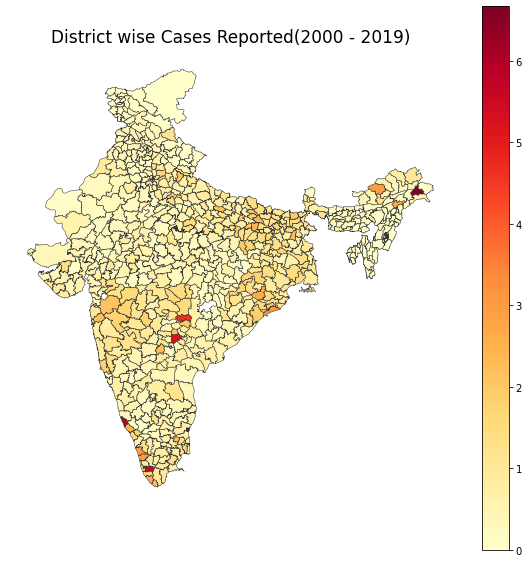

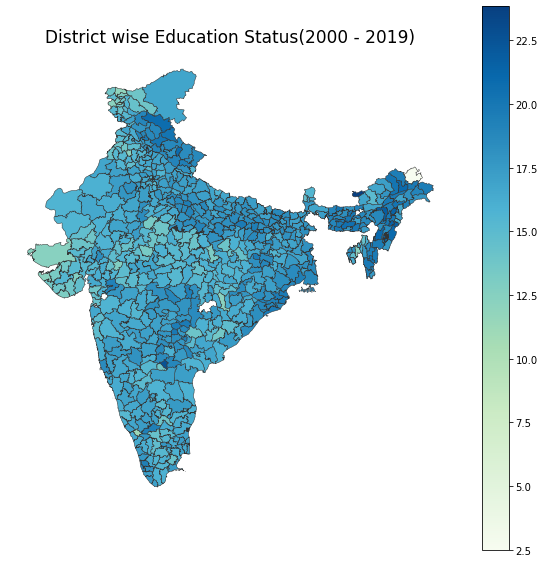

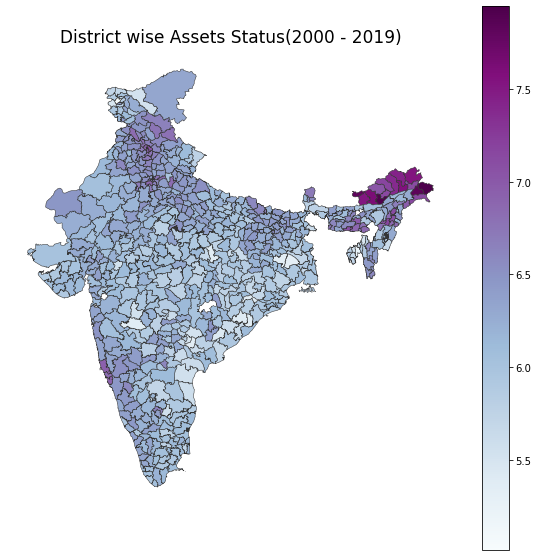

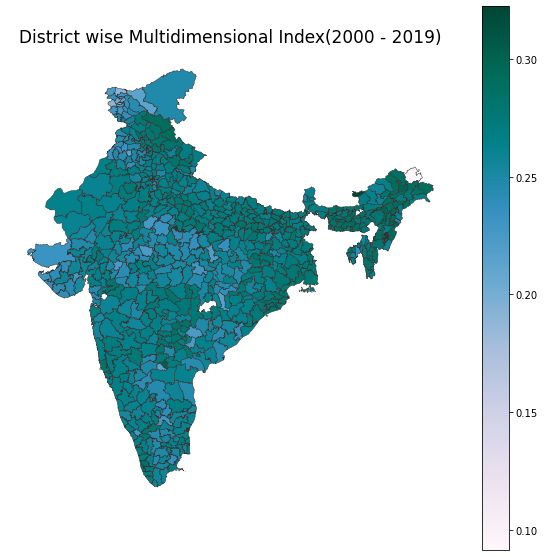

In [8]:
fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("District wise cases Reported (2000 - 2019)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="CASES REPORTED", cmap="YlOrRd", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("District wise Cases Reported(2000 - 2019)", size=17);

fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("District wise Education Status (2000 - 2019)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="education Num", cmap="GnBu", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("District wise Education Status(2000 - 2019)", size=17);

fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("District wise Assets Status (2000 - 2019)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="avg_assets", cmap="BuPu", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("District wise Assets Status(2000 - 2019)", size=17);

fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("District wise Multidimensional Index (2000 - 2019)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="final", cmap="PuBuGn", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("District wise Multidimensional Index(2000 - 2019)", size=17);


In [9]:

total_cases_sorted = r.sort_values("CASES REPORTED", ascending=False)[:10]
total_cases_sorted.head()
total_edu_sorted = r.sort_values("education Num", ascending=False)[:10]
total_edu_sorted.head()
total_asset_sorted = r.sort_values("avg_assets", ascending=False)[:10]
total_asset_sorted.head()
total_final_sorted = r.sort_values("final", ascending=False)[:10]
total_final_sorted.head()

,statename,distname,avg_assets,education Num,CASES REPORTED,final
24,Arunachal Pradesh,Tawang,7.813865,23.833333,0.000000,0.322440
634,Telangana,Wanaparthy,6.610954,22.636364,0.290909,0.303202
17,Arunachal Pradesh,East Siang,7.558399,20.916667,0.166667,0.298910
60,Assam,MAJULI,6.186447,22.000000,0.016667,0.298809
49,Assam,Golaghat,6.260613,21.793103,0.144828,0.297362


In [10]:
fig = px.bar(data_frame=total_cases_sorted, x="CASES REPORTED", y="distname", orientation='h', color_discrete_sequence=["red"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(title="Top 10 districts with highest number of Case reported over(2000-2012)")
fig.update_layout(xaxis_range=[2,7])
fig.layout.template ="plotly_dark"
fig.show()
fig = px.bar(data_frame=total_edu_sorted, x="education Num", y="distname", orientation='h', color_discrete_sequence=["green"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(title="Top 10 districts with highest education status over(2000-2012)")
fig.update_layout(xaxis_range=[20,25])
fig.layout.template ="plotly_dark"
fig.show()
fig = px.bar(data_frame=total_asset_sorted, x="avg_assets", y="distname", orientation='h', color_discrete_sequence=["blue"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(xaxis_range=[7,8])
fig.update_layout(title="Top 10 districts with highest Assets status over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()
fig = px.bar(data_frame=total_final_sorted, x="final", y="distname", orientation='h', color_discrete_sequence=["white"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(xaxis_range=[0.29,0.3])
fig.update_layout(title="Top 10 districts with highest Multidimensional Index over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()

In [11]:


m = pd.DataFrame(r.groupby(["statename"])["CASES REPORTED","education Num","avg_assets","final"].mean().reset_index())
m.replace(to_replace='Andaman & Nicobar Islands',value='Andaman & Nicobar Island',inplace=True)
m.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
m.replace(to_replace='Chhatisgarh',value='Chhattisgarh',inplace=True)
m.replace(to_replace='Dadra & Nagar Haveli',value='Dadara & Nagar Havelli',inplace=True)
m.replace(to_replace='Ladakh',value='',inplace=True)
m.replace(to_replace='Orissa',value='Odisha',inplace=True)
m.replace(to_replace='Pondicherry',value='Puducherry',inplace=True)
m = pd.DataFrame(m.groupby(["statename"])["CASES REPORTED","education Num","avg_assets","final"].mean().reset_index())
m.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,statename,CASES REPORTED,education Num,avg_assets,final
0,,0.000000,15.316176,5.923958,0.229986
1,Andhra Pradesh,0.524683,16.653522,5.848644,0.254342
2,Arunanchal Pradesh,0.936587,17.749708,7.437877,0.269850
3,Assam,0.353603,18.998164,6.246537,0.281887
4,Bihar,1.381491,17.946555,6.368465,0.273264


In [12]:
f = ("Indian_States.shp")
map_df = gpd.read_file(f)
map_df.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


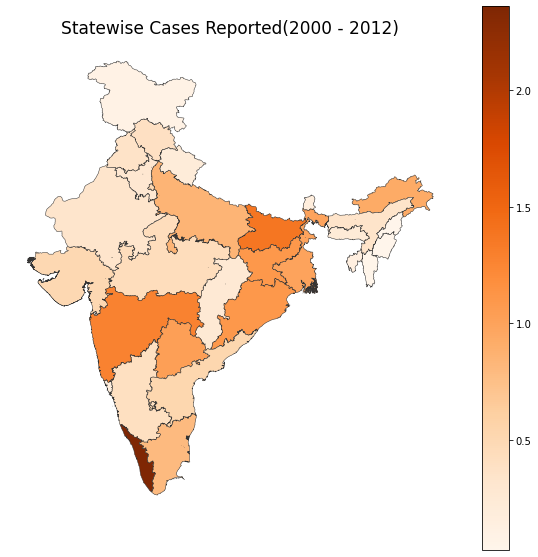

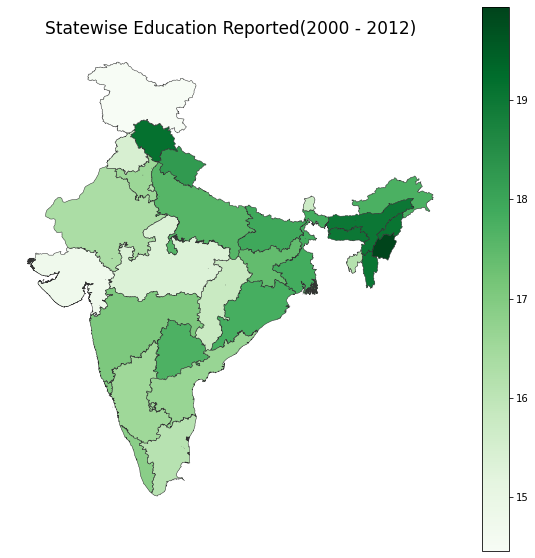

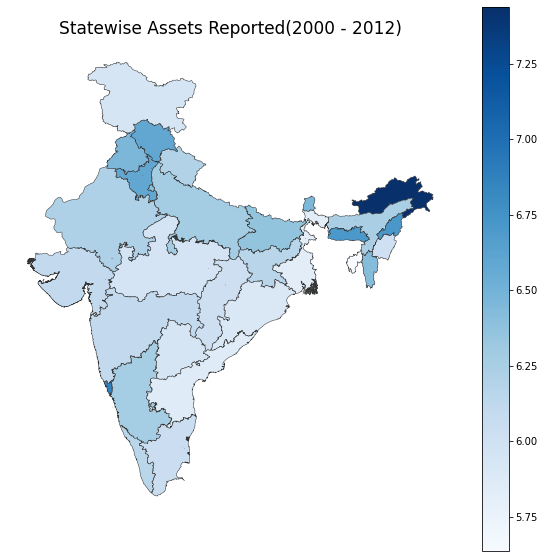

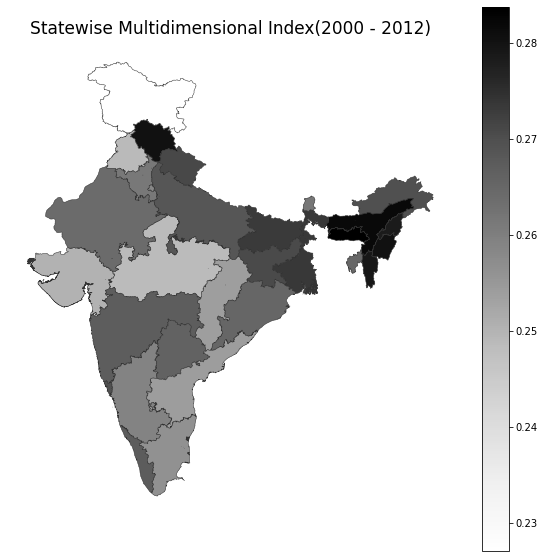

In [13]:
together = map_df.set_index('st_nm').join(m.set_index("statename"))
fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("State wise cases Reported (2000 - 2012)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="CASES REPORTED", cmap="Oranges", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("Statewise Cases Reported(2000 - 2012)", size=17);

fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("State wise Education Reported (2000 - 2012)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="education Num", cmap="Greens", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("Statewise Education Reported(2000 - 2012)", size=17);

fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("State wise Assets Reported (2000 - 2012)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="avg_assets", cmap="Blues", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("Statewise Assets Reported(2000 - 2012)", size=17);

fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("State Multidimensional Index (2000 - 2012)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="final", cmap="Greys", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("Statewise Multidimensional Index(2000 - 2012)", size=17);

In [14]:
total_cases_sorted = m.sort_values("CASES REPORTED", ascending=False)[:10]
fig = px.bar(data_frame=total_cases_sorted, x="CASES REPORTED", y="statename", orientation='h', color_discrete_sequence=["red"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(title="Top 10 states with highest number of Case reported over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()

total_edu_sorted = m.sort_values("education Num", ascending=False)[:10]
fig = px.bar(data_frame=total_edu_sorted, x="education Num", y="statename", orientation='h', color_discrete_sequence=["green"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(xaxis_range=[15,20])
fig.update_layout(title="Top 10 states with highest education status over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()

total_asset_sorted = m.sort_values("avg_assets", ascending=False)[:10]
fig = px.bar(data_frame=total_asset_sorted, x="avg_assets", y="statename", orientation='h', color_discrete_sequence=["blue"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(xaxis_range=[6,8])
fig.update_layout(title="Top 10 states with highest Assets status over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()

total_final_sorted = m.sort_values("final", ascending=False)[:10]
fig = px.bar(data_frame=total_final_sorted, x="final", y="statename", orientation='h', color_discrete_sequence=["white"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(xaxis_range=[0.27,0.29])
fig.update_layout(title="Top 10 states with highest Multidimensional Index over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()